In [128]:
#import python libraries

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
from google.colab import files
uploaded = files.upload()

Saving orderdataset.xlsx to orderdataset.xlsx


In [26]:
#read xlxs file

df = pd.read_csv("/content/orderdataset.csv", sep = ';',)

### 1. Check  and prepare data to clean and handling missing values and ensuring consistency.

In [27]:
#reading
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


In [28]:
df.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,05/09/2016,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,03/10/2016,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,03/10/2016,e-wallet,fashion,500.0


In [29]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'], format="%d/%m/%Y")

In [30]:
df.isna().sum()

order_id                  0
quantity                  0
product_id                0
price                     0
seller_id                 0
freight_value             0
customer_id               0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64

In [31]:
df = df.dropna()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49980 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               49980 non-null  object        
 1   quantity               49980 non-null  int64         
 2   product_id             49980 non-null  object        
 3   price                  49980 non-null  int64         
 4   seller_id              49980 non-null  object        
 5   freight_value          49980 non-null  int64         
 6   customer_id            49980 non-null  object        
 7   order_status           49980 non-null  object        
 8   purchase_date          49980 non-null  datetime64[ns]
 9   payment_type           49980 non-null  object        
 10  product_category_name  49980 non-null  object        
 11  product_weight_gram    49980 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usag

<Axes: xlabel='product_weight_gram'>

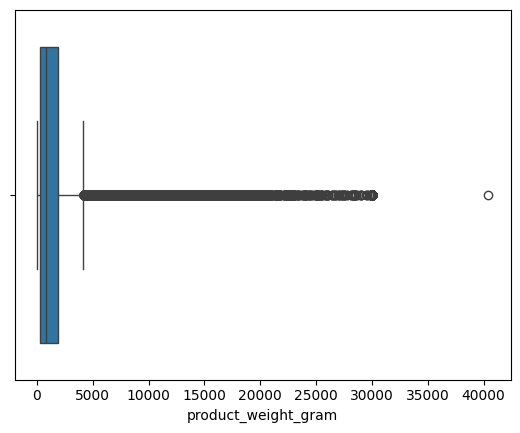

In [36]:
sns.boxplot(x=df["product_weight_gram"])

In [38]:
df[df['product_weight_gram']>35000]

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
40290,6ecf1a4051b4c5ed613624b460970a26,1,26644690fde745fc4654719c3904e1db,582000,1835b56ce799e6a4dc4eddc053f04066,87000,958279c23050d6207d196c3057648f6f,delivered,2017-11-17,debit card,electronics,40425.0


### 2. Summaries the data with statistical analysis: Use descriptive statistics with aggregation function (i.e sum, count, average, min, max) for searching meaningful information such as: top product sales, total amount, average amount, etc

In [71]:
gk = df.groupby('product_category_name')[['quantity']].sum().reset_index()

In [74]:
gk.sort_values(by=['quantity'], ascending=False)

,product_category_name,quantity
6,toys,7703
2,electronics,7536
0,automotive,7501
3,fashion,7484
1,beauty,7448
5,sports,7406
4,gadget,7390
7,utilities,7384


In [76]:
# Load your data (assuming 'data_split' is already prepared as shown in previous steps)
data_split = df

# Calculate total sales amount (price * quantity)
data_split['total_amount'] = data_split['price'] * data_split['quantity']

# Aggregation functions
summary_statistics = {
    'total_sales': data_split['total_amount'].sum(),
    'total_orders': data_split['order_id'].nunique(),
    'average_order_value': data_split['total_amount'].mean(),
    'min_order_value': data_split['total_amount'].min(),
    'max_order_value': data_split['total_amount'].max(),
    'total_quantity': data_split['quantity'].sum(),
    'average_quantity': data_split['quantity'].mean()
}

# Top product sales by total sales amount
top_products = data_split.groupby('product_id')['total_amount'].sum().sort_values(ascending=False).head(10)

# Top product sales by quantity sold
top_products_quantity = data_split.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)

# Display the results
print("Summary Statistics:")
for key, value in summary_statistics.items():
    print(f"{key}: {value}")

print("\nTop Products by Total Sales Amount:")
print(top_products)

print("\nTop Products by Quantity Sold:")
print(top_products_quantity)

Summary Statistics:
total_sales: 156000809000
total_orders: 42678
average_order_value: 3121264.68587435
min_order_value: 200000
max_order_value: 98940000
total_quantity: 59852
average_quantity: 1.1975190076030413

Top Products by Total Sales Amount:
product_id
422879e10f46682990de24d770e7f83d    1243964000
99a4788cb24856965c36a24e339b6058    1028276000
389d119b48cf3043d311335e499d9c6b     780584000
53759a2ecddad2bb87a079a1f1519f73     715026000
9571759451b1d780ee7c15012ea109d4     627470000
368c6c730842d78016ad823897a372db     613350000
154e7e31ebfa092203795c972e5804a6     596916000
d5991653e037ccb7af6ed7d94246b249     496697000
7c1bd920dbdf22470b68bde975dd3ccf     471974000
270516a3f41dc035aa87d220228f844c     442546000
Name: total_amount, dtype: int64

Top Products by Quantity Sold:
product_id
422879e10f46682990de24d770e7f83d    464
99a4788cb24856965c36a24e339b6058    406
389d119b48cf3043d311335e499d9c6b    285
53759a2ecddad2bb87a079a1f1519f73    275
154e7e31ebfa092203795c972e5804a6 

### 3. Use Statistical methods to identify significant correlation/comparative/distribution/trending between variables from the data

In [77]:
# Correlation matrix for numerical variables
correlation_matrix = df[['quantity', 'price', 'freight_value', 'product_weight_gram']].corr()
correlation_matrix

,quantity,price,freight_value,product_weight_gram
quantity,1.000000,-0.001709,-0.009900,-0.009247
price,-0.001709,1.000000,0.005134,0.002746
freight_value,-0.009900,0.005134,1.000000,-0.005212
product_weight_gram,-0.009247,0.002746,-0.005212,1.000000


In [79]:
# Comparative
anova_result = stats.f_oneway(df[df['order_status'] == 'delivered']['price'],
                              df[df['order_status'] == 'shipped']['price'],
                              df[df['order_status'] == 'canceled']['price'])
anova_result

F_onewayResult(statistic=0.8514323038555737, pvalue=0.42680943565509444)

In [83]:
anova_result = stats.f_oneway(df[df['product_category_name'] == 'toys']['price'],
                              df[df['product_category_name'] == 'electronics']['price'],
                              df[df['product_category_name'] == 'automotive']['price'],
                              df[df['product_category_name'] == 'fashion']['price'],
                              df[df['product_category_name'] == 'beauty']['price'],
                              df[df['product_category_name'] == 'sports']['price'],
                              df[df['product_category_name'] == 'gadget']['price'],
                              df[df['product_category_name'] == 'utilities']['price'])
anova_result

F_onewayResult(statistic=0.987278952074209, pvalue=0.4382239644922883)

In [86]:
anova_result = stats.f_oneway(df[df['product_category_name'] == 'toys']['quantity'],
                              df[df['product_category_name'] == 'electronics']['quantity'],
                              df[df['product_category_name'] == 'automotive']['quantity'],
                              df[df['product_category_name'] == 'fashion']['quantity'],
                              df[df['product_category_name'] == 'beauty']['quantity'],
                              df[df['product_category_name'] == 'sports']['quantity'],
                              df[df['product_category_name'] == 'gadget']['quantity'],
                              df[df['product_category_name'] == 'utilities']['quantity'])
anova_result

F_onewayResult(statistic=0.508086581478193, pvalue=0.8291884670110299)

The p-value of 0.829 is much greater than the typical significance level of 0.05, indicating that there is no statistically significant difference in the quantity among the different product categories.

In [101]:
# distribution
import pandas as pd
from scipy.stats import norm
from statsmodels.stats.diagnostic import lilliefors

# Membaca dataset dan mengambil kolom 'amount'
amount = df['total_amount']

# Melakukan uji Lilliefors
stat, p_value = lilliefors(amount, dist='norm')

# Menampilkan hasil
print(f'Statistik: {stat}, p-value: {p_value}')

# Interpretasi hasil
if p_value < 0.05:
    print("Data tidak mengikuti distribusi normal (menolak H0).")
else:
    print("Data mengikuti distribusi normal (gagal menolak H0).")

Statistik: 0.17421046905451598, p-value: 0.0009999999999998899
Data tidak mengikuti distribusi normal (menolak H0).


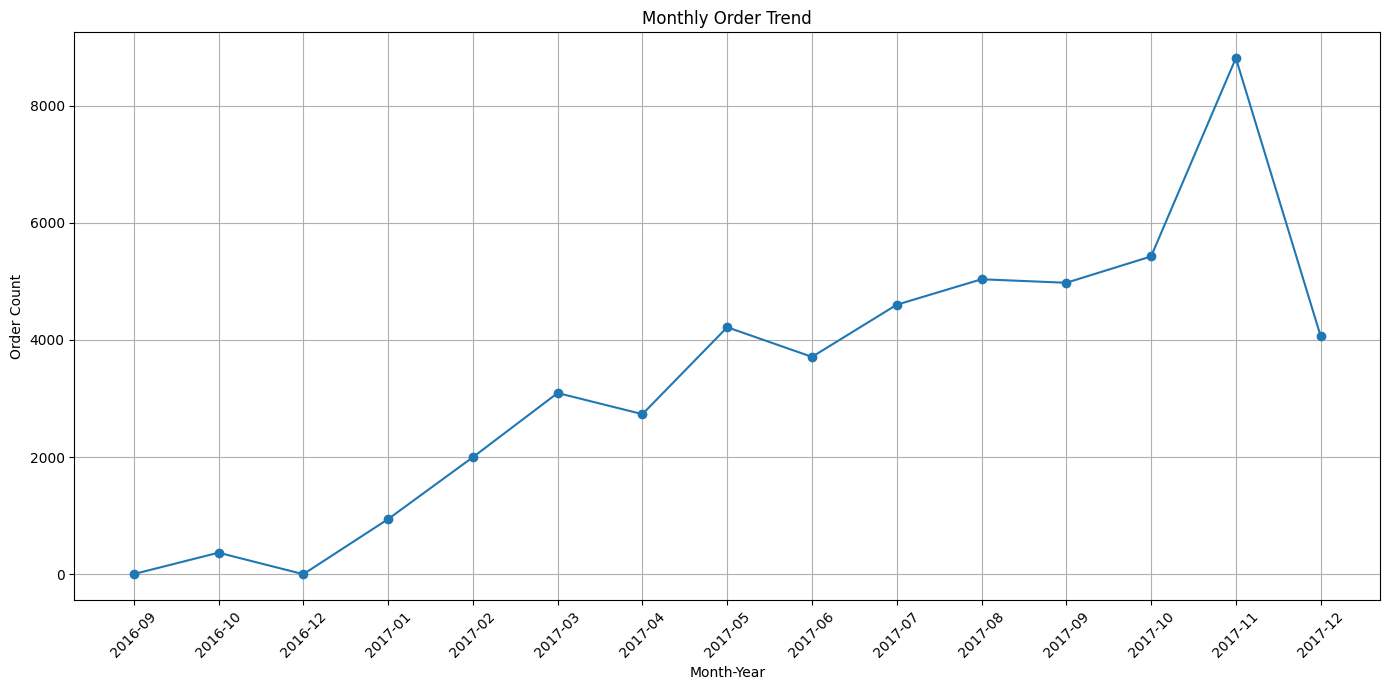

In [103]:
# trend
# Extract month and year from purchase_date
df['month_year'] = df['purchase_date'].dt.to_period('M')

# Group by month_year and count the number of orders
monthly_trend = df.groupby('month_year').size().reset_index(name='order_count')

# Plotting the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(monthly_trend['month_year'].astype(str), monthly_trend['order_count'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Monthly Order Trend')
plt.xlabel('Month-Year')
plt.ylabel('Order Count')
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Visualize the data with charts and graphs to see patterns and relationships (min. 3 graph)


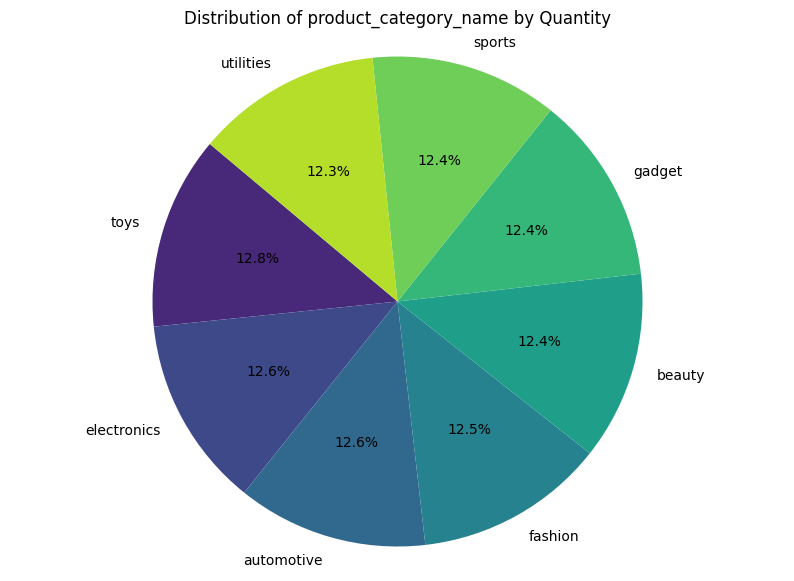

In [109]:
# Pie Chart for product_category_name by quantity
plt.figure(figsize=(10, 7))
order_status_counts = df['product_category_name'].value_counts()
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(order_status_counts)))
plt.title('Distribution of product_category_name by Quantity')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

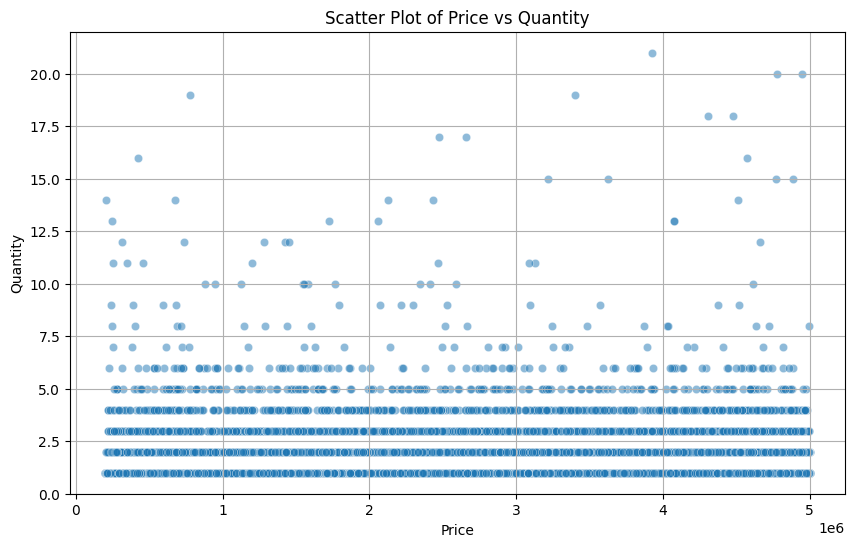

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for price and quantity using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='quantity', data=df, alpha=0.5)
plt.title('Scatter Plot of Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()


<ipython-input-116-89100772a2c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='viridis')


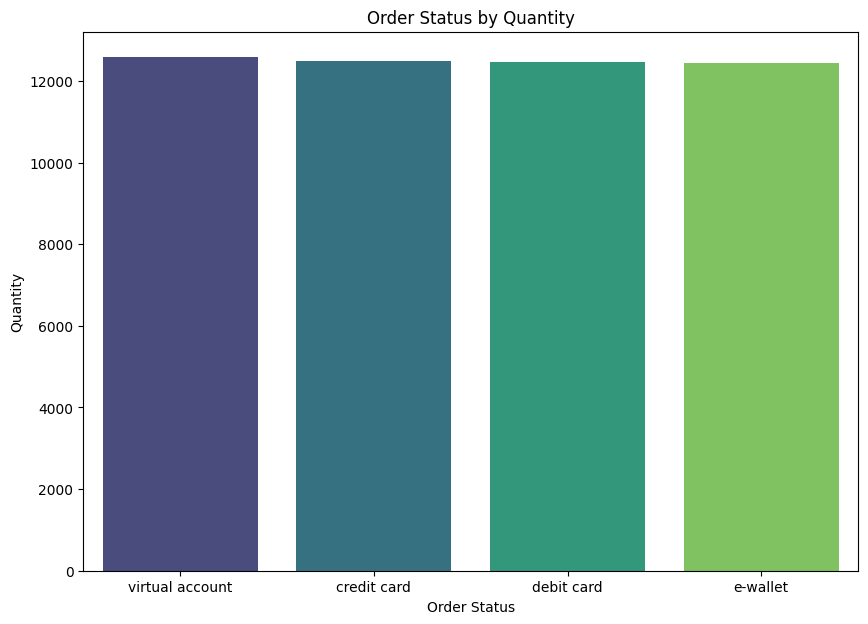

In [116]:
# Bar Chart for order_status by quantity
plt.figure(figsize=(10, 7))
order_status_counts = df['payment_type'].value_counts()
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='viridis')
plt.title('Order Status by Quantity')
plt.xlabel('Order Status')
plt.ylabel('Quantity')
plt.show()

In [129]:
# Group by purchase_date and payment_type, then sum the quantity
data_grouped = df.groupby(['purchase_date', 'payment_type'])['quantity'].sum().reset_index()

# Pivot the data to get payment types as columns
data_pivot = data_grouped.pivot(index='purchase_date', columns='payment_type', values='quantity').fillna(0)

# Reset index to use 'purchase_date' as a column
data_pivot.reset_index(inplace=True)

# Create a stacked area chart using Plotly
fig = px.area(data_pivot, x='purchase_date', y=data_pivot.columns[1:], title='Stacked Area Chart: Quantity per Payment Type by Purchase Date')

# Show the figure
fig.show()